In [1]:
import pandas as pd

In [3]:
train = pd.read_csv("bikedata/train.csv")
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test = pd.read_csv("bikedata/test.csv")
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train["datetime"] = pd.to_datetime(train["datetime"])

In [6]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

In [7]:
print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [8]:
test["datetime"] = pd.to_datetime(test["datetime"])

In [9]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
train["datetime-dayofweek(int)"] = train["datetime"].dt.dayofweek
test["datetime-dayofweek(int)"] = test["datetime"].dt.dayofweek

In [12]:
train["datetime-year_month"] = train["datetime-year"]*100 + train["datetime-month"]
test["datetime-year_month"] = test["datetime-year"]*100 +test["datetime-month"]

In [14]:
import numpy as np

In [15]:
train["windspeed"] = train["windspeed"].replace(0,np.NaN)
train["windspeed"] = train["windspeed"].fillna(method="ffill")
train["windspeed"] = train["windspeed"].fillna(6.9)

test["windspeed"] = test["windspeed"].replace(0,np.NaN)
test["windspeed"] = test["windspeed"].fillna(method="ffill")
#test["windspeed"] = test["windspeed"].fillna(6.9)
test[test["windspeed"].isnull()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek(int),datetime-year_month


In [16]:
train["weather"].replace(4,3)
test["weather"].replace(4,3)
train["weather1"] = train["weather"] == 1
train["weather2"] = train["weather"] == 2
train["weather3"] = train["weather"] == 3

test["weather1"] = test["weather"] == 1
test["weather2"] = test["weather"] == 2
test["weather3"] = test["weather"] == 3

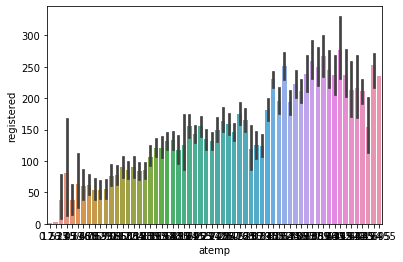

In [173]:
sns.barplot(data = train, x ="atemp" ,y = "registered")

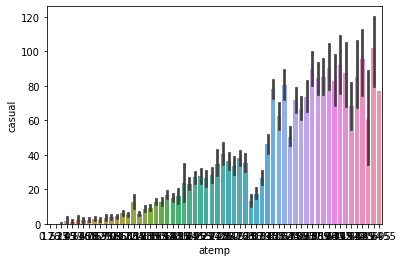

In [174]:
sns.barplot(data = train, x = "atemp",y = "casual")

In [192]:
train["discomfort"] = 9 / 5 * train["temp"] - 0.55 * (1 - train["humidity"]) * (9 / 5 * train["temp"] - 26) + 32
test["discomfort"] = 9 / 5 * test["temp"] - 0.55 * (1 - test["humidity"]) * (9 / 5 * test["temp"] - 26) + 32

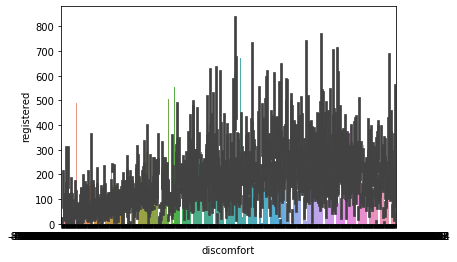

In [193]:
sns.barplot(data = train, x = "discomfort",y = "registered")

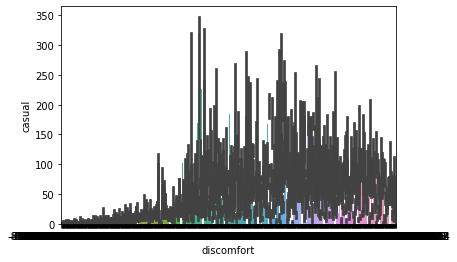

In [194]:
sns.barplot(data = train, x = "discomfort",y = "casual")

In [778]:
train["temp(int)"] = train["temp"].round()
train["atemp(int)"] = train["atemp"].round()
test["temp(int)"] = test["temp"].round()
test["atemp(int)"] = test["atemp"].round()

train["temp(difference)"] = train["temp(int)"] - train["atemp(int)"]
test["temp(difference)"] = test["temp(int)"] - test["atemp(int)"]


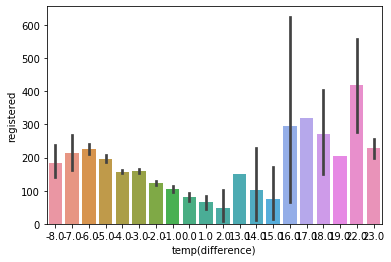

In [779]:
sns.barplot(data = train,x = "temp(difference)",y="registered")

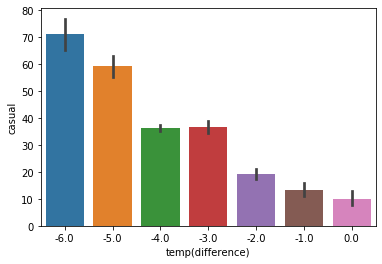

In [760]:
sns.barplot(data = train,x = "temp(difference)",y="casual")

In [761]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek(int)',
       'datetime-year_month', 'weather1', 'weather2', 'weather3', 'discomfort',
       'temp(int)', 'atemp(int)', 'temp(difference)', 'windspeed(int)',
       'humidity(int)', 'datetime-day_dayofweek', 'datetime-hour_dayofweek',
       'discomfort(int)'],
      dtype='object')

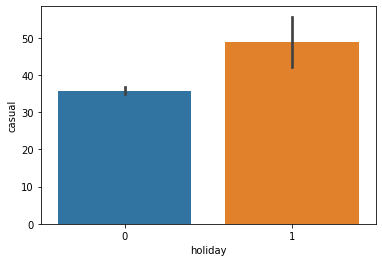

In [762]:
sns.barplot(data = train, x = "holiday",y = "casual")

In [391]:
train["windspeed(int)"] = train["windspeed"].round()
test["windspeed(int)"] = test["windspeed"].round()

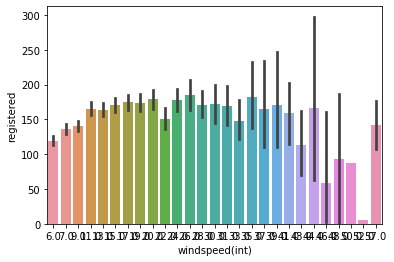

In [392]:
sns.barplot(data = train , x = "windspeed(int)",y = "registered")

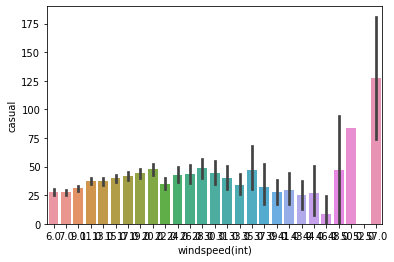

In [393]:
sns.barplot(data = train , x = "windspeed(int)",y = "casual")

In [416]:
train["humidity(int)"] = train["humidity"].round()
test["humidity(int)"] = test["humidity"].round()

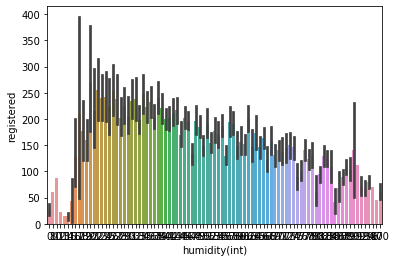

In [417]:
sns.barplot(data = train, x = "humidity(int)",y = "registered")

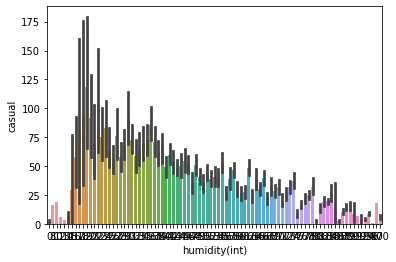

In [418]:
sns.barplot(data = train, x = "humidity(int)",y = "casual")

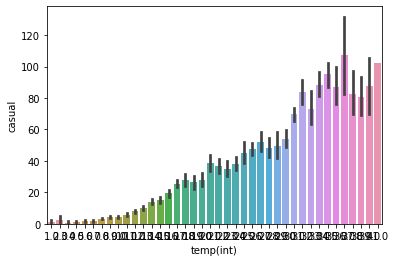

In [435]:
sns.barplot(data = train, x = "temp(int)",y = "casual")

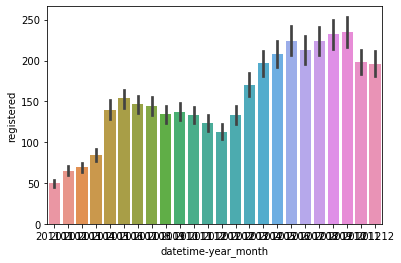

In [485]:
sns.barplot(data = train, x = "datetime-year_month",y = "registered")

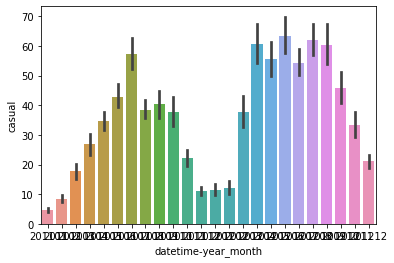

In [537]:
sns.barplot(data = train, x = "datetime-year_month",y = "casual")

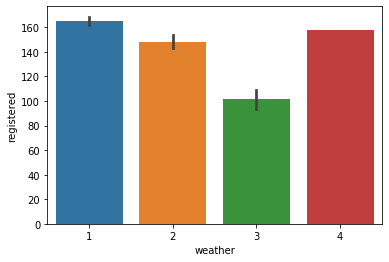

In [577]:
sns.barplot(data = train, x = "weather", y = "registered")

In [612]:
train["datetime-hour_dayofweek"] = train["datetime-hour"]*10 + train["datetime-dayofweek(int)"]
test["datetime-hour_dayofweek"] = test["datetime-hour"]*10 +test["datetime-dayofweek(int)"]

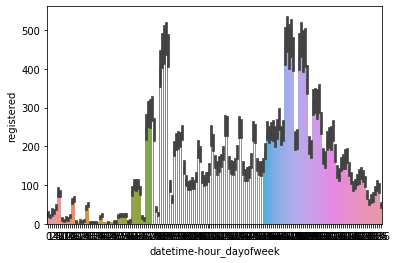

In [613]:
sns.barplot(data = train, x = "datetime-hour_dayofweek", y = "registered")

In [719]:
train["discomfort(int)"] = train["discomfort"].round()
test["discomfort(int)"] = test["discomfort"].round()

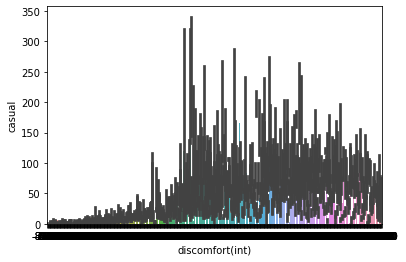

In [712]:
sns.barplot(data = train , x = "discomfort(int)",y = "casual")

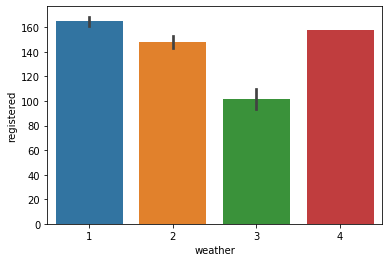

In [780]:
sns.barplot(data = train, x = "weather",y = "registered")

In [802]:
feature_names_casual = ["season",  "weather","workingday","temp(difference)","holiday",
                 "windspeed(int)","humidity(int)","temp","datetime-hour_dayofweek","datetime-dayofweek(int)",
                 "datetime-year", "datetime-hour","atemp"]
feature_names_registered = ["season",  "weather","workingday","datetime-dayofweek(int)",
                 "windspeed(int)","temp","temp(difference)","humidity(int)",
                 "datetime-year", "datetime-hour","atemp"]

In [803]:
X_train_casual = train[feature_names_casual]
X_test_casual = test[feature_names_casual]
X_train_registered = train[feature_names_registered]
X_test_registered = test[feature_names_registered]

In [804]:
y_train_casual = train["casual"]
y_train_registered = train["registered"]

In [805]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 개수입니다. 10을 넣으면 10개의 트리를 생성합니다.
# 2) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 3) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestRegressor(n_estimators=200,
                              n_jobs=-1,
                              random_state=1)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [806]:
from sklearn.model_selection import cross_val_predict

y_predict_casual = cross_val_predict(model, X_train_casual, y_train_casual, cv =20)
y_predict_registered = cross_val_predict(model, X_train_registered, y_train_registered, cv = 20)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_log_error

score_casual = mean_squared_log_error(y_train_casual,y_predict_casual)
score_casual

In [ ]:
score_registered = mean_squared_log_error(y_train_registered,y_predict_registered)
score_registered

In [ ]:
score_casual + score_registered

In [807]:
model.fit(X_train_casual, y_train_casual)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [808]:
predictions_casual = model.predict(X_test_casual)

In [809]:
model.fit(X_train_registered, y_train_registered)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [810]:
predictions_registered = model.predict(X_test_registered)

In [811]:
submission = pd.read_csv("bikedata/sampleSubmission.csv")

In [812]:
submission["count"] = predictions_registered + predictions_casual

In [813]:
submission.to_csv("bikedata/baseline-script_0.43018.csv", index=False)